In [22]:
# import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Data can be found at: <a href="https://mbta-massdot.opendata.arcgis.com/datasets/7acd353c1a734eb8a23caf46a0e66b23_0/explore">MBTA_Bus_Ridership_by_Time_Period_Fall</a> 

In [2]:
df = pd.read_csv("../../data/MBTA_Bus_Ridership_by_Time_Period_Fall.csv")

C:\Users\hanna\AppData\Local\Temp\ipykernel_36012\3019257522.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../../data/MBTA_Bus_Ridership_by_Time_Period_Fall.csv")


### **1. Initial checks**

In [3]:
df.head()

,mode,season,route_id,route_name,route_variant,stop_sequence,direction_id,day_type_id,day_type_name,time_period_id,time_period_name,stop_name,stop_id,average_ons,average_offs,average_load,num_trips,ons_all_trips,ObjectId
0,3,Fall 2016,1,1,1-_-0,19,0,day_type_01,weekday,time_period_06,PM_PEAK,MASSACHUSETTS AVE @ SIDNEY ST,101,1.400000,2.636842,32.894737,19,26.6,1
1,3,Fall 2016,1,1,1-_-0,20,0,day_type_01,weekday,time_period_06,PM_PEAK,MASSACHUSETTS AVE @ PROSPECT,102,3.868421,10.178947,26.584211,19,73.5,2
2,3,Fall 2016,1,1,1-_-0,21,0,day_type_01,weekday,time_period_06,PM_PEAK,MASSACHUSETTS AVE @ BIGELOW S,104,1.521053,1.168421,26.936842,19,28.9,3
3,3,Fall 2016,1,1,1-_-0,22,0,day_type_01,weekday,time_period_06,PM_PEAK,MASSACHUSETTS AVE @ HANCOCK S,106,0.321053,1.621053,25.626316,19,6.1,4
4,3,Fall 2016,1,1,1-_-0,23,0,day_type_01,weekday,time_period_06,PM_PEAK,MASSACHUSETTS AVE @ DANA ST,107,0.647368,3.336842,22.942105,19,12.3,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086511 entries, 0 to 1086510
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   mode              1086511 non-null  int64  
 1   season            1086511 non-null  object 
 2   route_id          1086511 non-null  object 
 3   route_name        1086511 non-null  object 
 4   route_variant     1086511 non-null  object 
 5   stop_sequence     1086511 non-null  int64  
 6   direction_id      1086511 non-null  int64  
 7   day_type_id       1086511 non-null  object 
 8   day_type_name     1086511 non-null  object 
 9   time_period_id    1086511 non-null  object 
 10  time_period_name  1086511 non-null  object 
 11  stop_name         1086511 non-null  object 
 12  stop_id           1086511 non-null  int64  
 13  average_ons       1086511 non-null  float64
 14  average_offs      1086511 non-null  float64
 15  average_load      1086510 non-null  float64
 16  

In [11]:
df['season'].unique()

array(['Fall 2016', 'Fall 2017', 'Fall 2018', 'Fall 2019', 'Fall 2020',
       'Fall 2021', 'Fall 2022', 'Fall 2023', 'Fall 2024'], dtype=object)

In [12]:
df['season'].value_counts()

season
Fall 2018    134352
Fall 2017    134221
Fall 2016    132848
Fall 2019    128457
Fall 2020    117145
Fall 2021    112548
Fall 2023    109131
Fall 2022    109116
Fall 2024    108692
Name: count, dtype: int64

In [5]:
df.isna().sum()

mode                0
season              0
route_id            0
route_name          0
route_variant       0
stop_sequence       0
direction_id        0
day_type_id         0
day_type_name       0
time_period_id      0
time_period_name    0
stop_name           0
stop_id             0
average_ons         0
average_offs        0
average_load        1
num_trips           0
ons_all_trips       0
ObjectId            0
dtype: int64

Looks like there's one null column. We will drop this in step 2

In [6]:
df.describe()

,mode,stop_sequence,direction_id,stop_id,average_ons,average_offs,average_load,num_trips,ons_all_trips,ObjectId
count,1086511.0,1.086511e+06,1.086511e+06,1.086511e+06,1.086511e+06,1.086511e+06,1.086510e+06,1.086511e+06,1.086511e+06,1.086511e+06
mean,3.0,2.703473e+01,4.958560e-01,1.088404e+04,5.934856e-01,5.987779e-01,9.551229e+00,6.929670e+00,5.233421e+00,5.432560e+05
std,0.0,3.689943e+01,4.999831e-01,1.945152e+04,1.879222e+00,2.023244e+00,8.155511e+00,1.150073e+01,2.863989e+01,3.136489e+05
min,3.0,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-2.222222e-01,-3.533333e-01,1.000000e+00,0.000000e+00,1.000000e+00
25%,3.0,1.100000e+01,0.000000e+00,2.176000e+03,0.000000e+00,0.000000e+00,3.700000e+00,2.000000e+00,0.000000e+00,2.716285e+05
50%,3.0,2.300000e+01,0.000000e+00,4.761000e+03,1.000000e-01,1.000000e-01,7.400000e+00,3.000000e+00,4.000000e-01,5.432560e+05
75%,3.0,3.800000e+01,1.000000e+00,8.454000e+03,4.666667e-01,4.645161e-01,1.303333e+01,7.000000e+00,2.300000e+00,8.148835e+05
max,3.0,1.360000e+04,1.000000e+00,1.199130e+05,1.967000e+02,6.780000e+01,1.967000e+02,1.440000e+02,2.378400e+03,1.086511e+06


`mode` is the same for every row. Doesn't add anything so we can drop this in step 2.


In [7]:
df.describe(include=['object'])

,season,route_id,route_name,route_variant,day_type_id,day_type_name,time_period_id,time_period_name,stop_name
count,1086511,1086511,1086511,1086511,1086511,1086511,1086511,1086511,1086511
unique,9,330,309,1069,3,3,11,10,7578
top,Fall 2018,34E,34E,240-1-1,day_type_01,weekday,time_period_05,OFF_PEAK,FOREST HILLS STATION UPPER BU
freq,134352,27608,27608,7755,886311,886311,132424,200200,2481


In [8]:
df.duplicated().sum()

np.int64(0)

### **2. Data cleaning & preprocessing** 

Since the null value is just a single row we can drop it


In [9]:
df = df.dropna()

In [10]:
df = df.drop(columns=['mode'])

### **3. Define questions**

How did ridership change before and after the pandemic, across routes, stops, and time periods?
- Did average ridership drop after COVID-19?
- Which routes or stops recovered the fastest?
- Did travel patterns shift across times of day or days of the week?

#### **3.1. Visual Analysis** 

Below we created a new column Pre-pandemic (2016–2019) and Post-pandemic (2020 onwards). To choose the cutoff date we used WHO's pandemic declaration which is March 11,2020.

In [14]:
df['period'] = df['season'].apply(lambda x: 'pre-pandemic' if '2016' <= x[-4:] <= '2019' else 'post-pandemic')

In [15]:
df.groupby('period')[['average_ons', 'average_offs', 'average_load']].mean()


,average_ons,average_offs,average_load
period,,,
post-pandemic,0.507090,0.511747,7.971930
pre-pandemic,0.684245,0.690204,11.210268


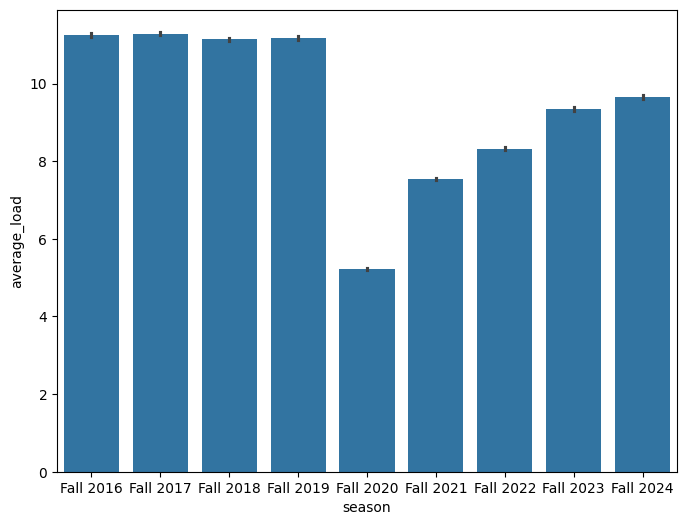

In [23]:
plt.figure(figsize=(8,6))
sns.barplot(x='season', y='average_load', data=df)
plt.show()


<Axes: xlabel='period', ylabel='average_load'>

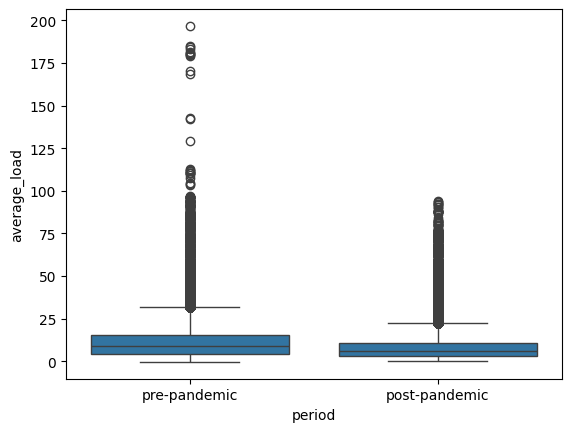

In [17]:
sns.boxplot(x='period', y='average_load', data=df)


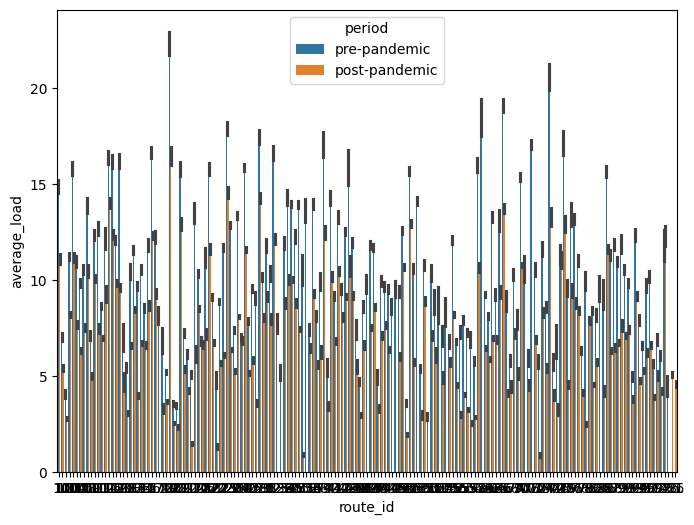

In [24]:
plt.figure(figsize=(8,6))
sns.barplot(x='route_id', y='average_load', hue='period', data=df)
plt.show()

#### **3.2. Statistical Analysis**